<a href="https://colab.research.google.com/github/mdepasquale1023/Rahway-Public-School-District/blob/main/Rahway_ELA_Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the Excel file to examine its structure and contents
file_path = '/content/drive/MyDrive/Schools/Copy of Database_DistrictStateDetail.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows and the column headers to understand what kind of data is available
data.head(), data.columns


(Empty DataFrame
 Columns: [Important 2022-2023 Notes - Please Read Before Using Data in this Database
 The 2022-2023 School Performance Reports include all data that was previously reported prior to the COVID-19 pandemic, which includes all assessment, student growth, and accountability data.
 
 Data throughout the reports has been impacted by the pandemic in various ways, so the NJDOE recommends caution in comparing data from year to year.
 
 Refer to the School Performance Reports Reference Guide for more details about the availability of data, the source of data measures, and how measures are calculated.]
 Index: [],
 Index(['Important 2022-2023 Notes - Please Read Before Using Data in this Database\nThe 2022-2023 School Performance Reports include all data that was previously reported prior to the COVID-19 pandemic, which includes all assessment, student growth, and accountability data.\n\nData throughout the reports has been impacted by the pandemic in various ways, so the NJDOE 

In [5]:
# Checking all sheets in the Excel file to ensure we are working with the correct one
all_sheets = pd.ExcelFile(file_path)
all_sheets.sheet_names

['Important 2022-2023 Notes',
 'Header and Contact',
 'EnrollmentTrendsbyGrade',
 'EnrollmentTrendsByStudentGroup',
 'EnrollmentByRacialEthnicGroup',
 'PreKAndK-FullDayHalfDay',
 'EnrollmentTrendsFullSharedTime',
 'EnrollmentByHomeLanguage',
 'StudentGrowthTrends',
 'StudentGrowth',
 'StudentGrowthByGrade',
 'StudentGrowthByPerformLevel',
 'ELAMathPerformanceTrends',
 'ELAParticipationPerformance',
 'ELAPerformanceTrends',
 'ELAPerformanceByGrade',
 'MathParticipationPerformance',
 'MathPerformanceTrends',
 'MathPerformanceByGradeTest',
 'ScienceAssessmentSummaryByGrade',
 'ScienceAssessmentByGrade',
 'AlternateAssessmentParticipatio',
 'EnglishLangProgressToProficienc',
 'NJGPA',
 'EnglishLangParticipationPerform',
 'NAEP',
 'PSAT-SAT-ACTParticipation',
 'PSAT-SAT-ACTPerformance',
 'APIBCourseworkPartPerf',
 'APIBDualEnrPartByStudentGrp',
 'APIBCoursesOffered',
 'CTE_SLEParticipation',
 'CTEParticipationByStudentGroup',
 'WorkbasedLearningByCareerClust',
 'IndustryValuedCredentialsEar

In [6]:
# Load data from "ELAPerformanceTrends" and "MathPerformanceTrends" sheets
ela_performance_trends = pd.read_excel(file_path, sheet_name='ELAPerformanceTrends')
math_performance_trends = pd.read_excel(file_path, sheet_name='MathPerformanceTrends')

# Display the first few rows of each DataFrame to understand the structure and contents
ela_performance_overview = ela_performance_trends.head()
math_performance_overview = math_performance_trends.head()

ela_performance_overview, math_performance_overview, ela_performance_trends.columns, math_performance_trends.columns


(  CountyCode CountyName DistrictCode                     DistrictName  \
 0         01   Atlantic         0010  Absecon Public Schools District   
 1         01   Atlantic         0010  Absecon Public Schools District   
 2         01   Atlantic         0010  Absecon Public Schools District   
 3         01   Atlantic         0010  Absecon Public Schools District   
 4         01   Atlantic         0010  Absecon Public Schools District   
 
   SchoolYear    Grades % Met/Exceeded Expectation  
 0  2022-2023  Grade 03                       43.6  
 1  2022-2023  Grade 04                       45.3  
 2  2022-2023  Grade 05                       43.4  
 3  2022-2023  Grade 06                       48.5  
 4  2022-2023  Grade 07                       54.5  ,
   CountyCode CountyName DistrictCode                     DistrictName  \
 0         01   Atlantic         0010  Absecon Public Schools District   
 1         01   Atlantic         0010  Absecon Public Schools District   
 2         01

The data from the "ELAPerformanceTrends" and "MathPerformanceTrends" sheets includes the following columns for both English Language Arts (ELA) and Mathematics performance across different grades:

* CountyCode: Code representing the county
* CountyName: Name of the county
* DistrictCode: Code representing the district
* DistrictName: Name of the district
* SchoolYear: Academic year
* Grades/Grades/Subject: Specific grades or subjects
* % Met/Exceeded Expectation: Percentage of students who met or exceeded expectations

In [7]:
# Convert the percentage met/exceeded expectation to numeric, handling non-numeric entries
ela_performance_trends['% Met/Exceeded Expectation'] = pd.to_numeric(ela_performance_trends['% Met/Exceeded Expectation'], errors='coerce')
math_performance_trends['% Met/Exceeded Expectation'] = pd.to_numeric(math_performance_trends['% Met/Exceeded Expectation'], errors='coerce')

# Filter the data for the most recent school year
ela_recent = ela_performance_trends[ela_performance_trends['SchoolYear'] == '2022-2023']
math_recent = math_performance_trends[math_performance_trends['SchoolYear'] == '2022-2023']

# Group by County and District and calculate the average performance for all grades combined
ela_grouped = ela_recent.groupby(['CountyName', 'DistrictName']).agg({'% Met/Exceeded Expectation': 'mean'}).reset_index()
math_grouped = math_recent.groupby(['CountyName', 'DistrictName']).agg({'% Met/Exceeded Expectation': 'mean'}).reset_index()

# Overview of statewide performance
statewide_ela_performance = ela_grouped.sort_values('% Met/Exceeded Expectation', ascending=False)
statewide_math_performance = math_grouped.sort_values('% Met/Exceeded Expectation', ascending=False)

# Extracting performance data for Union County
union_county_ela = ela_grouped[ela_grouped['CountyName'] == 'Union']
union_county_math = math_grouped[math_grouped['CountyName'] == 'Union']

# Overview of Union County performance
union_ela_overview = union_county_ela.sort_values('% Met/Exceeded Expectation', ascending=False)
union_math_overview = union_county_math.sort_values('% Met/Exceeded Expectation', ascending=False)

# Summarize results
statewide_ela_performance.head(), statewide_ela_performance.tail(), union_ela_overview, statewide_math_performance.head(), statewide_math_performance.tail(), union_math_overview


(    CountyName                                       DistrictName  \
 420   Monmouth         Monmouth County Vocational School District   
 623      Union  Union County Vocational-Technical School District   
 29      Bergen  Bergen County Vocational Technical School Dist...   
 459     Morris                   Mendham Township School District   
 352     Mercer                           Princeton Charter School   
 
      % Met/Exceeded Expectation  
 420                   98.200000  
 623                   96.700000  
 29                    96.100000  
 459                   93.816667  
 352                   93.783333  ,
      CountyName                        DistrictName  \
 150      Camden         Camden City School District   
 7      Atlantic     Egg Harbor City School District   
 201  Cumberland      Bridgeton City School District   
 356      Mercer      Trenton Public School District   
 210  Cumberland  Greenwich Township School District   
 
      % Met/Exceeded Expectat

## ELA and Math Performance Overview for New Jersey (2022-2023)
###Top 5 Districts in ELA Performance:

* Monmouth County Vocational School District (Monmouth): 98.2%
* Union County Vocational-Technical School District (Union): 96.7%
* Bergen County Vocational Technical School District (Bergen): 96.1%
* Mendham Township School District (Morris): 93.8%
* Princeton Charter School (Mercer): 93.8%

###Bottom 5 Districts in ELA Performance:

* Greenwich Township School District (Cumberland): Data not available
* Trenton Public School District (Mercer): 12.7%
* Bridgeton City School District (Cumberland): 13.0%
* Egg Harbor City School District (Atlantic): 13.3%
* Camden City School District (Camden): 14.4%

## Union County ELA Performance Breakdown:
* Best Performing: Union County Vocational-Technical School District (96.7%)
* Lowest Performing: Roselle Public School District (15.6%)

###Top 5 Districts in Math Performance:

* Monmouth County Vocational School District (Monmouth): 98.3%
* Union County Vocational-Technical School District (Union): 97.4%
* Bergen County Vocational Technical School District (Bergen): 96.5%
* Mendham Township School District (Morris): 94.0%
* Princeton Charter School (Mercer): 93.6%

### Bottom 5 Districts in Math Performance:

* Greenwich Township School District (Cumberland): Data not available
* Trenton Public School District (Mercer): 12.6%
* Bridgeton City School District (Cumberland): 12.9%
* Egg Harbor City School District (Atlantic): 13.3%
* Camden City School District (Camden): 14.3%

### Union County Math Performance Breakdown:
* Best Performing: Union County Vocational-Technical School District (97.4%)
* Lowest Performing: Union County TEAMS Charter School-High School/Elementary (15.1%)


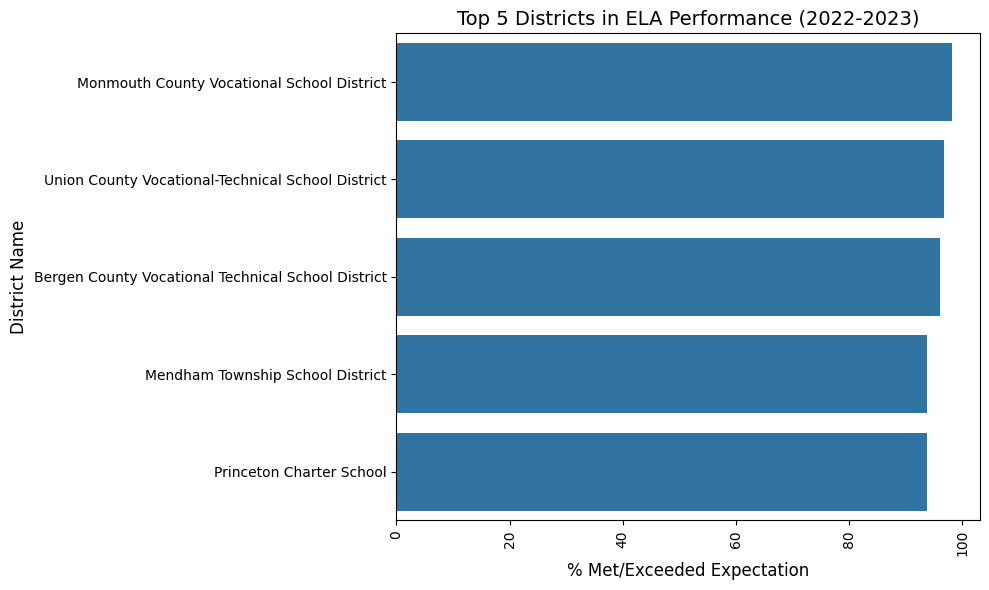

In [13]:
# Bar graph for statewide_ela_performance.head()  with the X-Axis labels vertical so we can read them better

import matplotlib.pyplot as plt
import seaborn as sns

ela_top_5 = statewide_ela_performance.head()

plt.figure(figsize=(10, 6))

sns.barplot(x="% Met/Exceeded Expectation", y="DistrictName", data=ela_top_5)

plt.xlabel("% Met/Exceeded Expectation", fontsize=12)
plt.ylabel("District Name", fontsize=12)
plt.title("Top 5 Districts in ELA Performance (2022-2023)", fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


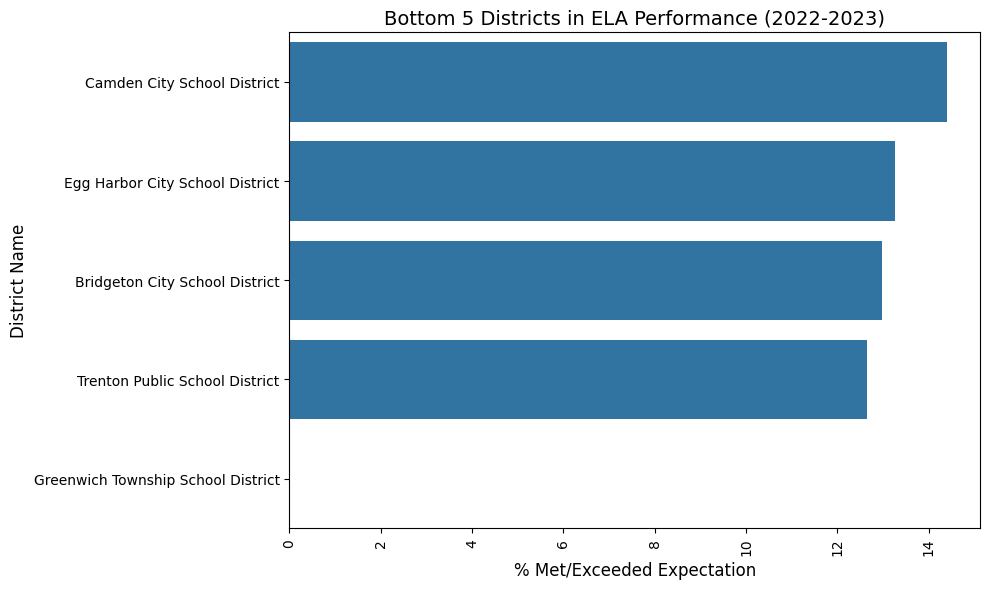

In [26]:
# Bar graph for statewide_ela_performance.tail() with the X-Axis labels vertical so we can read them better

ela_bottom_5 = statewide_ela_performance.tail()

plt.figure(figsize=(10, 6))

sns.barplot(x="% Met/Exceeded Expectation", y="DistrictName", data=ela_bottom_5)

plt.xlabel("% Met/Exceeded Expectation", fontsize=12)
plt.ylabel("District Name", fontsize=12)
plt.title("Bottom 5 Districts in ELA Performance (2022-2023)", fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


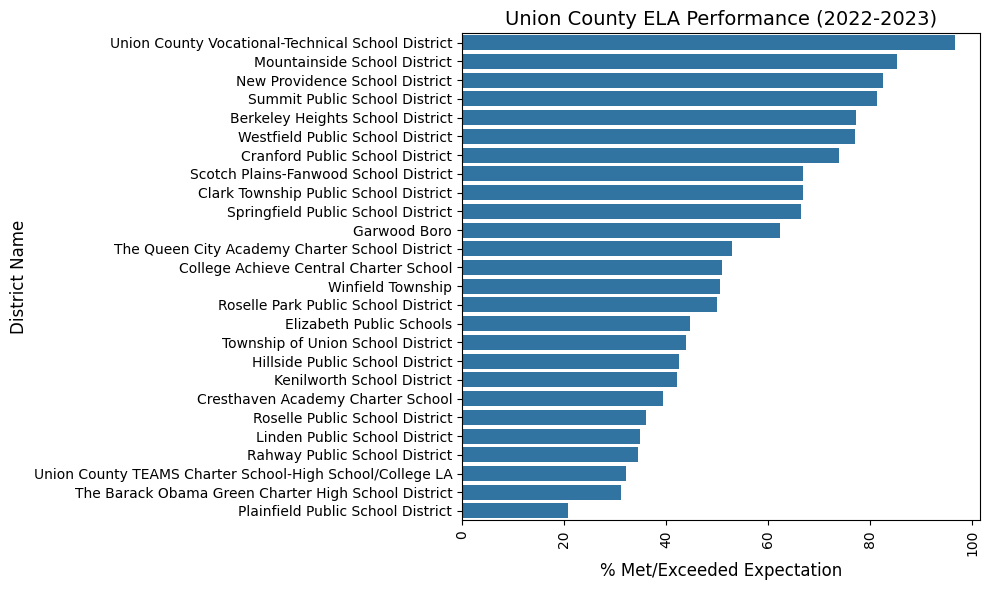

In [15]:
# Bar graph for union_ela_overview with the X-Axis labels vertical so we can read them better

# Create a bar plot with vertical labels
plt.figure(figsize=(10, 6))

sns.barplot(x="% Met/Exceeded Expectation", y="DistrictName", data=union_ela_overview)

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("% Met/Exceeded Expectation", fontsize=12)
plt.ylabel("District Name", fontsize=12)
plt.title("Union County ELA Performance (2022-2023)", fontsize=14)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


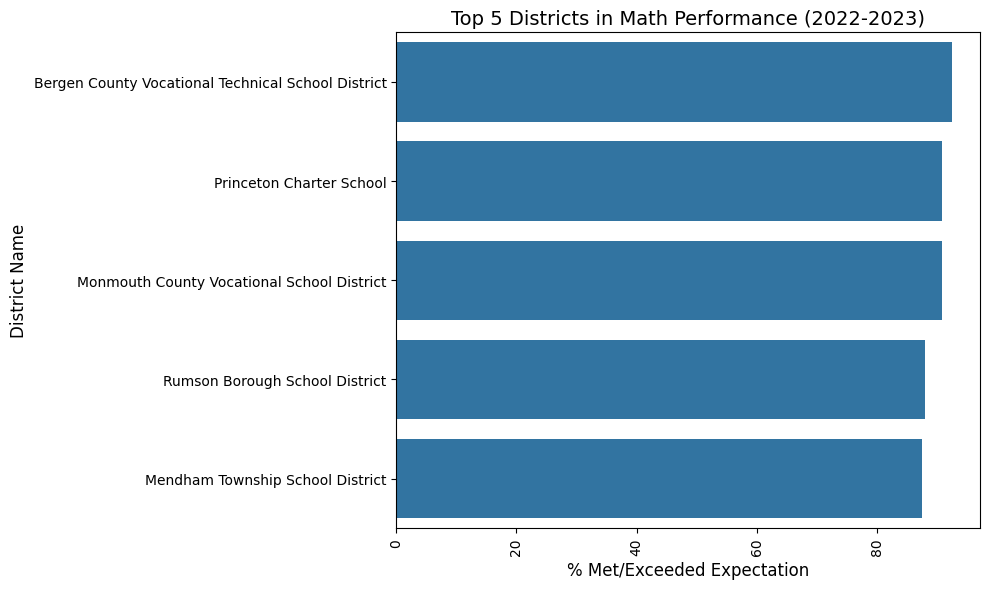

In [16]:
# Bar graph for statewide_math_performance.head() with the X-Axis labels vertical so we can read them better

math_top_5 = statewide_math_performance.head()

plt.figure(figsize=(10, 6))

sns.barplot(x="% Met/Exceeded Expectation", y="DistrictName", data=math_top_5)

plt.xlabel("% Met/Exceeded Expectation", fontsize=12)
plt.ylabel("District Name", fontsize=12)
plt.title("Top 5 Districts in Math Performance (2022-2023)", fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


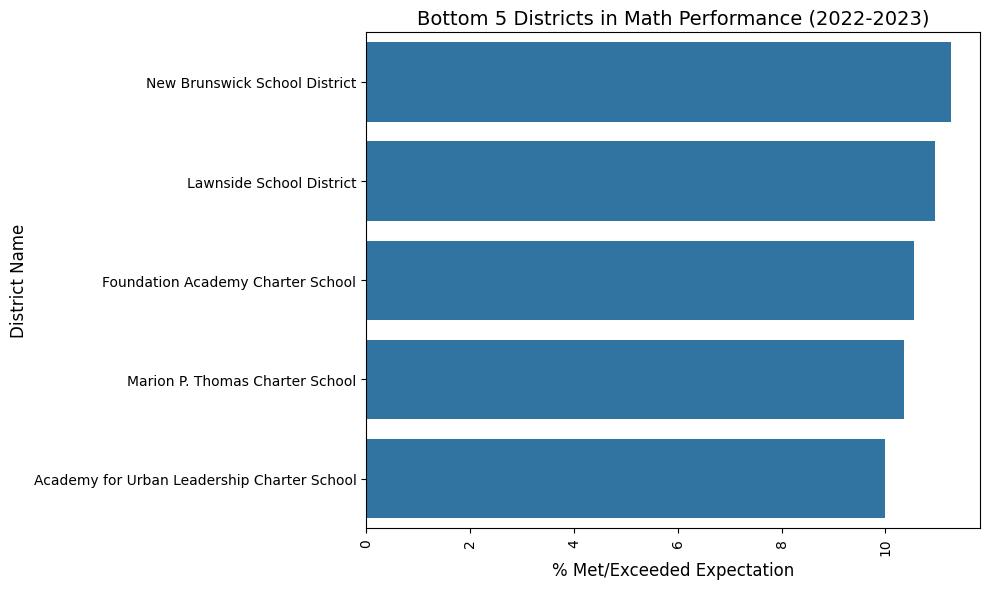

In [18]:
# Bar graph for statewide_math_performance.tail()with the X-Axis labels vertical so we can read them better

# Create a bar plot with vertical labels
plt.figure(figsize=(10, 6))

# Filter out districts with null values
math_bottom_5 = statewide_math_performance.dropna(subset=['% Met/Exceeded Expectation']).tail()

sns.barplot(x="% Met/Exceeded Expectation", y="DistrictName", data=math_bottom_5)

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("% Met/Exceeded Expectation", fontsize=12)
plt.ylabel("District Name", fontsize=12)
plt.title("Bottom 5 Districts in Math Performance (2022-2023)", fontsize=14)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


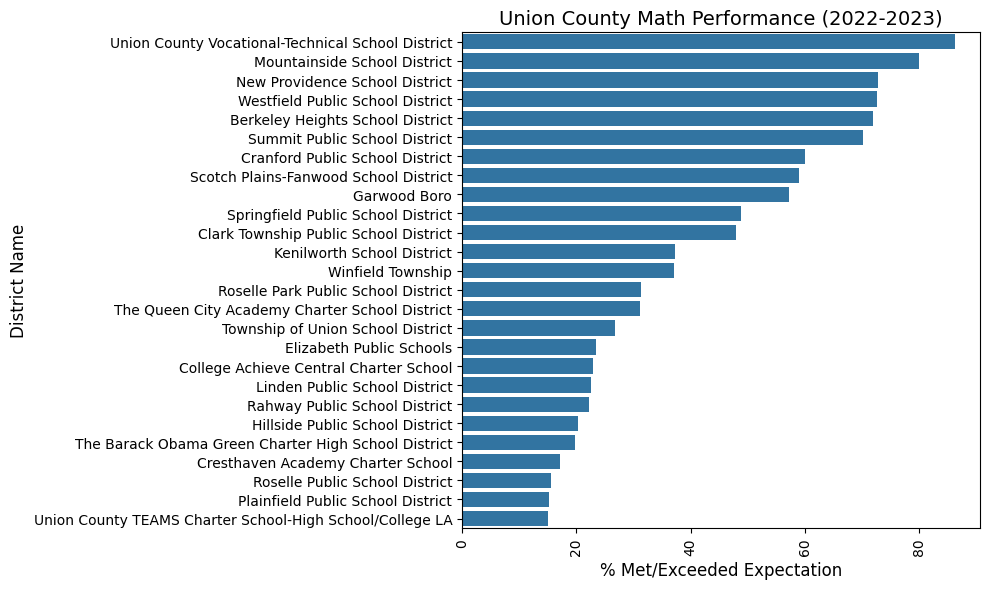

In [19]:
# Bar graph for union_math_overview with the X-Axis labels vertical so we can read them better

# Create a bar plot with vertical labels
plt.figure(figsize=(10, 6))

sns.barplot(x="% Met/Exceeded Expectation", y="DistrictName", data=union_math_overview)

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("% Met/Exceeded Expectation", fontsize=12)
plt.ylabel("District Name", fontsize=12)
plt.title("Union County Math Performance (2022-2023)", fontsize=14)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# Filtering data for Rahway School District in both ELA and Math performance
rahway_ela_performance = ela_recent[(ela_recent['CountyName'] == 'Union') & (ela_recent['DistrictName'] == 'Rahway Public School District')]
rahway_math_performance = math_recent[(math_recent['CountyName'] == 'Union') & (math_recent['DistrictName'] == 'Rahway Public School District')]

# Displaying the detailed performance data for ELA and Math
rahway_ela_details = rahway_ela_performance.groupby('Grades')['% Met/Exceeded Expectation'].mean().reset_index()
rahway_math_details = rahway_math_performance.groupby('Grades/Subject')['% Met/Exceeded Expectation'].mean().reset_index()

rahway_ela_details, rahway_math_details


(     Grades  % Met/Exceeded Expectation
 0  Grade 03                        25.9
 1  Grade 04                        41.1
 2  Grade 05                        45.1
 3  Grade 06                        37.5
 4  Grade 07                        32.4
 5  Grade 08                        30.2
 6  Grade 09                        29.3,
   Grades/Subject  % Met/Exceeded Expectation
 0      Algebra I                         NaN
 1     Algebra II                        18.2
 2       Geometry                        17.2
 3       Grade 03                        31.7
 4       Grade 04                        23.3
 5       Grade 05                        22.7
 6       Grade 06                        20.3
 7       Grade 07                         NaN
 8       Grade 08                         NaN)

##Rahway School District Performance Details (2022-2023)
###ELA Performance by Grade:

* Grade 03: 25.9% Met/Exceeded Expectations
* Grade 04: 41.1%
* Grade 05: 45.1%
* Grade 06: 37.5%
* Grade 07: 32.4%
* Grade 08: 30.2%
* Grade 09: 29.3%

###Math Performance by Grade/Subject:

* Algebra I: Data not available
* Algebra II: 18.2%
* Geometry: 17.2%
* Grade 03: 31.7%
* Grade 04: 23.3%
* Grade 05: 22.7%
* Grade 06: 20.3%
* Grade 07: Data not available
* Grade 08: Data not available

The data shows varied performance across different grades with the highest ELA scores in Grade 05 and a noticeable drop in higher grades. For Math, the data is particularly concerning in high school subjects like Algebra II and Geometry with very low percentages of students meeting or exceeding expectations.

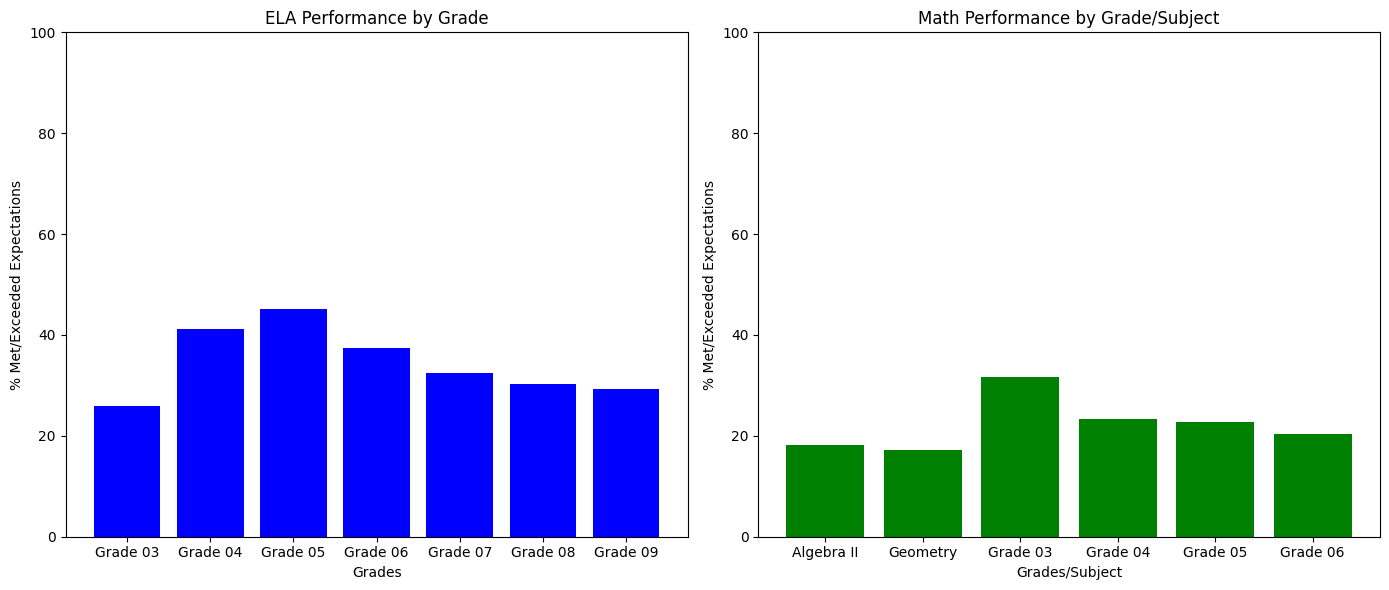

In [23]:

# Prepare data for plotting
ela_grades = rahway_ela_details['Grades']
ela_scores = rahway_ela_details['% Met/Exceeded Expectation']
math_grades_subjects = rahway_math_details['Grades/Subject']
math_scores = rahway_math_details['% Met/Exceeded Expectation']

# Creating plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# ELA Performance plot
axes[0].bar(ela_grades, ela_scores, color='blue')
axes[0].set_title('ELA Performance by Grade')
axes[0].set_xlabel('Grades')
axes[0].set_ylabel('% Met/Exceeded Expectations')
axes[0].set_ylim(0, 100)

# Math Performance plot
axes[1].bar(math_grades_subjects, math_scores, color='green')
axes[1].set_title('Math Performance by Grade/Subject')
axes[1].set_xlabel('Grades/Subject')
axes[1].set_ylabel('% Met/Exceeded Expectations')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


* ELA Performance by Grade: This graph shows a fluctuation in ELA scores across the grades. There's a peak in Grade 05 and generally higher scores in the middle grades compared to the others.

* Math Performance by Grade/Subject: This graph illustrates that Math scores are consistently lower than ELA, with particularly low performance in high school subjects like Algebra II and Geometry.

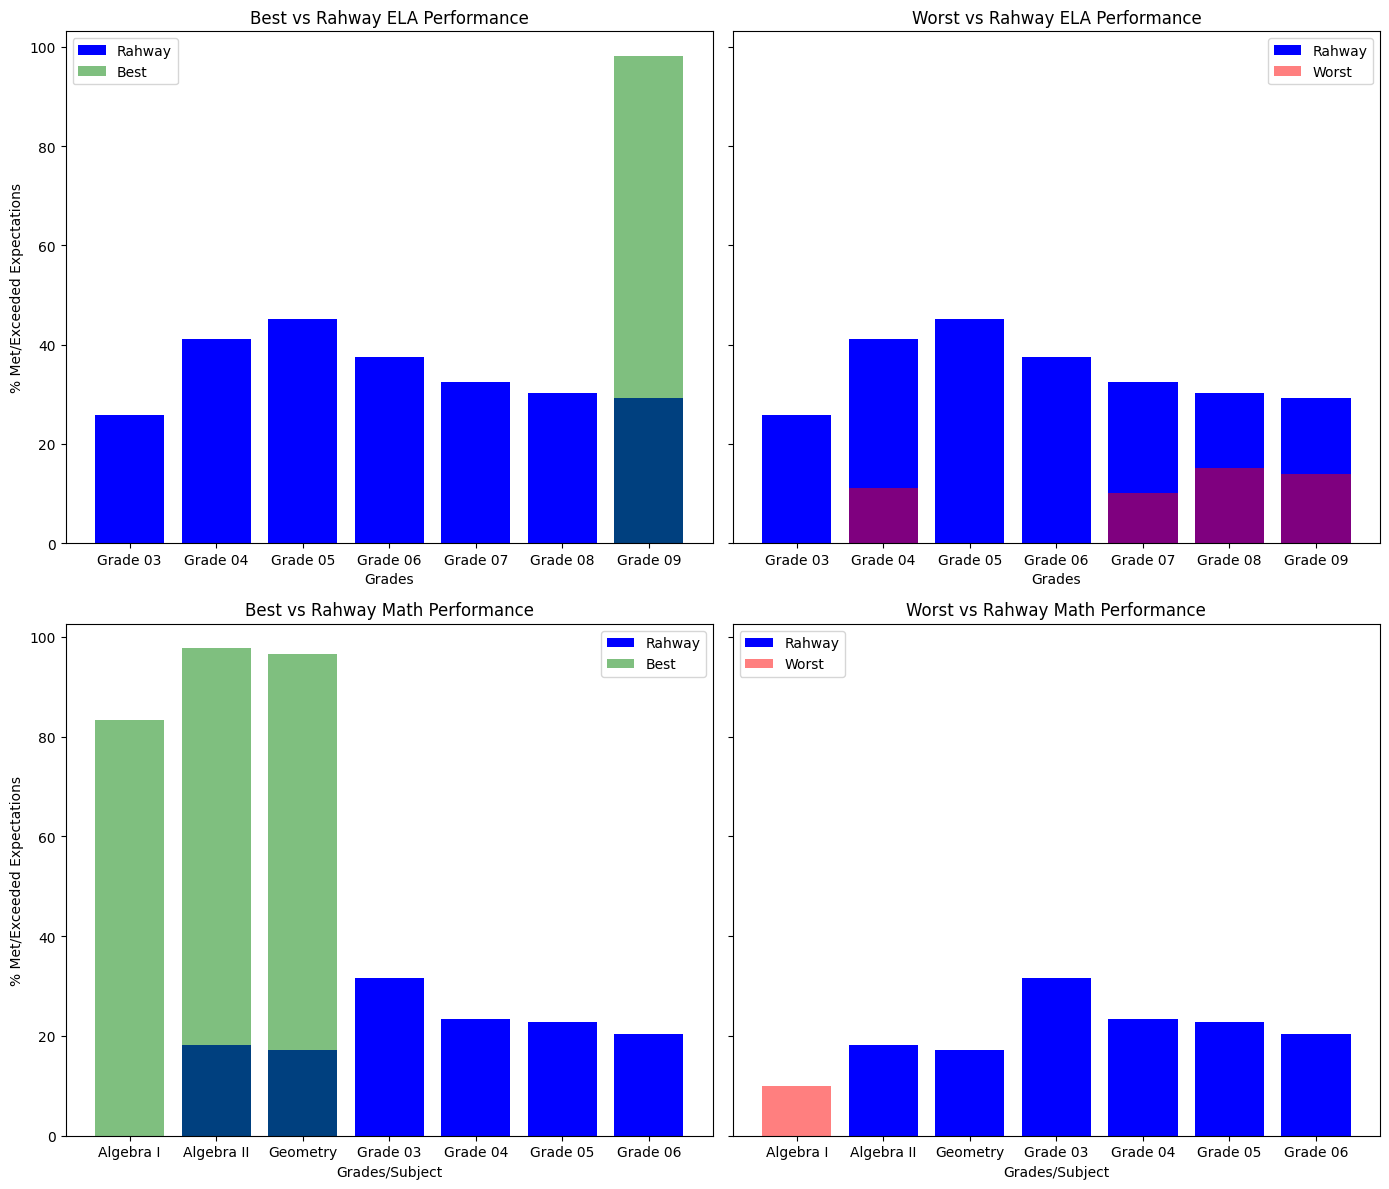

In [24]:
# Identifying the best and worst performing districts in ELA and Math
best_ela_district_name = statewide_ela_performance.iloc[0]['DistrictName']
worst_ela_district_name = statewide_ela_performance.dropna().iloc[-1]['DistrictName']
best_math_district_name = statewide_math_performance.iloc[0]['DistrictName']
worst_math_district_name = statewide_math_performance.dropna().iloc[-1]['DistrictName']

# Filtering data for these districts
best_ela_performance = ela_recent[ela_recent['DistrictName'] == best_ela_district_name].groupby('Grades')['% Met/Exceeded Expectation'].mean().reset_index()
worst_ela_performance = ela_recent[ela_recent['DistrictName'] == worst_ela_district_name].groupby('Grades')['% Met/Exceeded Expectation'].mean().reset_index()
best_math_performance = math_recent[math_recent['DistrictName'] == best_math_district_name].groupby('Grades/Subject')['% Met/Exceeded Expectation'].mean().reset_index()
worst_math_performance = math_recent[math_recent['DistrictName'] == worst_math_district_name].groupby('Grades/Subject')['% Met/Exceeded Expectation'].mean().reset_index()

# Creating comparative plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharey='row')

# ELA Performance comparison
axes[0, 0].bar(ela_grades, ela_scores, color='blue', label='Rahway')
axes[0, 0].bar(best_ela_performance['Grades'], best_ela_performance['% Met/Exceeded Expectation'], color='green', alpha=0.5, label='Best')
axes[0, 0].set_title('Best vs Rahway ELA Performance')
axes[0, 0].set_xlabel('Grades')
axes[0, 0].set_ylabel('% Met/Exceeded Expectations')
axes[0, 0].legend()

axes[0, 1].bar(ela_grades, ela_scores, color='blue', label='Rahway')
axes[0, 1].bar(worst_ela_performance['Grades'], worst_ela_performance['% Met/Exceeded Expectation'], color='red', alpha=0.5, label='Worst')
axes[0, 1].set_title('Worst vs Rahway ELA Performance')
axes[0, 1].set_xlabel('Grades')
axes[0, 1].legend()

# Math Performance comparison
axes[1, 0].bar(math_grades_subjects, math_scores, color='blue', label='Rahway')
axes[1, 0].bar(best_math_performance['Grades/Subject'], best_math_performance['% Met/Exceeded Expectation'], color='green', alpha=0.5, label='Best')
axes[1, 0].set_title('Best vs Rahway Math Performance')
axes[1, 0].set_xlabel('Grades/Subject')
axes[1, 0].set_ylabel('% Met/Exceeded Expectations')
axes[1, 0].legend()

axes[1, 1].bar(math_grades_subjects, math_scores, color='blue', label='Rahway')
axes[1, 1].bar(worst_math_performance['Grades/Subject'], worst_math_performance['% Met/Exceeded Expectation'], color='red', alpha=0.5, label='Worst')
axes[1, 1].set_title('Worst vs Rahway Math Performance')
axes[1, 1].set_xlabel('Grades/Subject')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


## ELA Performance:
* Best vs Rahway: Rahway is significantly outperformed by the district with the best ELA results. The difference is notable across all grades.
* Worst vs Rahway: Rahway performs better than the worst district, particularly noticeable in the middle grades.

## Math Performance:
* Best vs Rahway: Similar to ELA, Rahway is far behind the best performing district in Math, with a clear gap across all relevant grades.
* Worst vs Rahway: Rahway outperforms the worst district across various grades, although the differences are less pronounced compared to ELA.

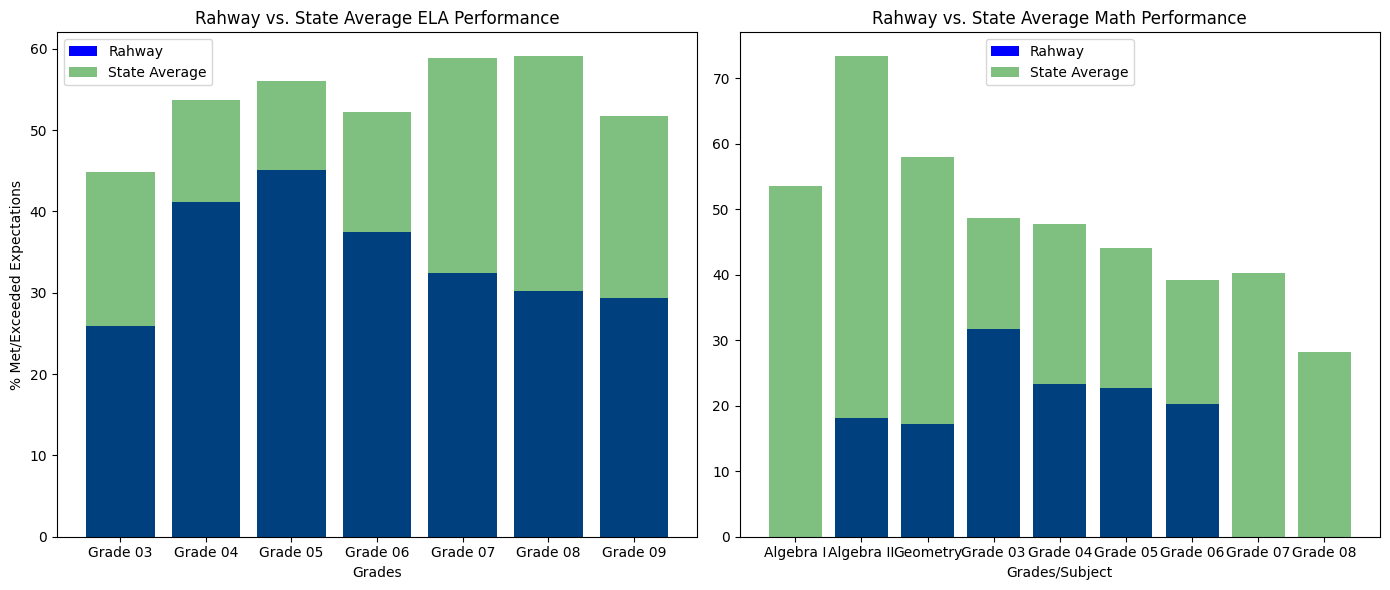

In [25]:
# Calculate state averages for ELA and Math
state_ela_average = ela_recent.groupby('Grades')['% Met/Exceeded Expectation'].mean().reset_index()
state_math_average = math_recent.groupby('Grades/Subject')['% Met/Exceeded Expectation'].mean().reset_index()

# Creating comparative plots for Rahway vs. State Average
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# ELA Performance comparison with State Average
axes[0].bar(ela_grades, ela_scores, color='blue', label='Rahway')
axes[0].bar(state_ela_average['Grades'], state_ela_average['% Met/Exceeded Expectation'], color='green', alpha=0.5, label='State Average')
axes[0].set_title('Rahway vs. State Average ELA Performance')
axes[0].set_xlabel('Grades')
axes[0].set_ylabel('% Met/Exceeded Expectations')
axes[0].legend()

# Math Performance comparison with State Average
axes[1].bar(math_grades_subjects, math_scores, color='blue', label='Rahway')
axes[1].bar(state_math_average['Grades/Subject'], state_math_average['% Met/Exceeded Expectation'], color='green', alpha=0.5, label='State Average')
axes[1].set_title('Rahway vs. State Average Math Performance')
axes[1].set_xlabel('Grades/Subject')
axes[1].legend()

plt.tight_layout()
plt.show()


## ELA Performance:
* Rahway's performance in ELA generally falls below the state average across all grades. This difference is more pronounced in some grades than others, highlighting areas where Rahway might focus efforts to improve.

## Math Performance:
* Similar to ELA, Rahway's Math performance also trails behind the state average across all relevant grades. The gap is especially noticeable in upper elementary and middle school grades.